<a href="https://colab.research.google.com/github/shirart/data_science_final_proj/blob/main/final_project_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **final project**  |  predicting heart disease





Shir Artzi 209044502

Lior Yadgarov 315852848

Ariel Ohayon 206912354

data set: https://www.kaggle.com/cherngs/heart-disease-cleveland-uci



Heart diseases are the leading cause for most deaths globally which affects both men and women of all races.

The main goal of this project is to locate patients with a higher risk of heart disease based on known data which mostly provided by medical labs and hospitals.

Furthermore, its significance is the possibilty of saving lives by early detection.

The model can be implement in medical centers and cardiology sections in hospitals, so that the percentages of early detection of heart diseases will increase.


In [1]:
#######################################################################################################
# libraries:
#######################################################################################################

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree 
from sklearn.ensemble import RandomForestClassifier

In [2]:
#######################################################################################################
# first analysis:
#######################################################################################################

d_heart = pd.read_csv('heart_cleveland_upload.csv')
d_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [3]:
d_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


# **general information:**

* 297 samples

* 13 features

* numerical data - the data is classified as int64 except oldpeak (float64)

* the project deals with **classifcation** problem - whether a patient more likely to have a heart disease or not.



In [ ]:
d_heart.isnull().sum()

# **features:**

1. **age**
2.  **sex** - **1 = male**
3.  **cp** - chest pain type based on location (around the substernal portion of the body), cause (emotional/physical stress) and relief (nitroglycerine/ a rest) 

*   0 - typical (all the criteria)
*   1 - atypical (two criteria)

*   2 - non-anginal pain (one criteria)
*   3 - asymptomatic (none)


4.  **trestbps** - resting blood pressure
5.  **chol** - serum cholestoral 
6.  **fbs** - fasting blood sugar > 120 mg/dl     **1 = likely to be diabetic (true)**
7.  **restecg** -resting electrocardiographic (ECG) results

*   0 - normal
*   1 - ST-T wave abnormality (T inversions/ST elevation or depression) 

*  2 -  probable or definite left ventricular hypertrophy (heart condition) by Estes' criteria

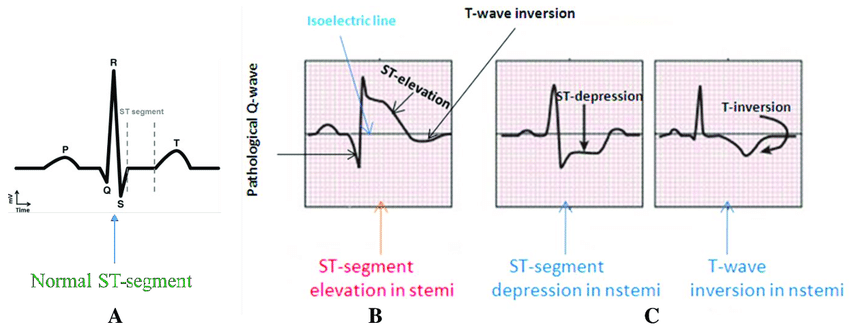

(image from : https://www.researchgate.net/publication 333912486_Wearable_Real-Time_Heart_Attack_Detection_and_Warning_System_to_Reduce_Road_Accidents)

8.  **thalach** - maximum heart rate achieved
9.  **exang** - exercise induced angina (chest pain) **1 = yes** 
10. **oldpeak** - ST depression induced by exercise relative to rest
11. **slope** - the slope of the peak exercise ST segment (indicator for identifying presence of insufficient blood supply)

* 0 - upsloping
* 1 - flat
* 2 - downsloping

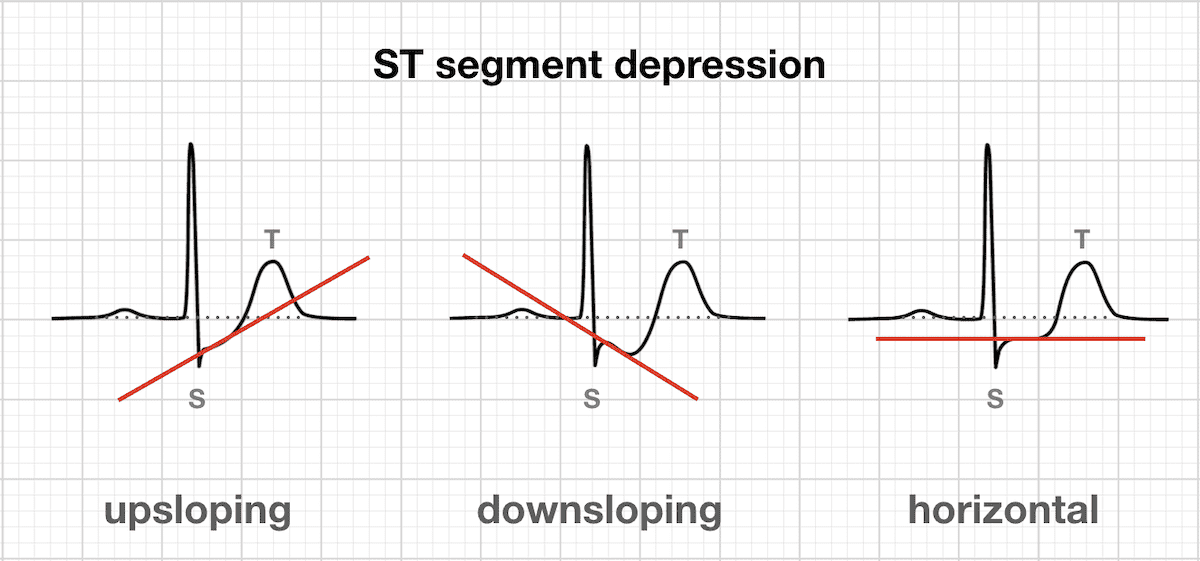

(image from : https://litfl.com/myocardial-ischaemia-ecg-library/)

12. **ca** - number of major vessels colored by flourosopy (a heart vessel coloured by the radioactive dye means that it's too narrow to let the blood flow correctly). 
The quantity is **positively correlated** with presence of heart disease (0-3). 


13. **thal** - medical method for discovering heart abnormalities by examination of how well Thallium is absorbed in heart tissue during exercise and rest.

*   0 - normal
*   1 - fixed defect (heart tissue can't absorb thallium)
*   2 - reversible defect (heart tissue is unable to absorb thallium only during exercise.




# **features categorization:**

**categorical**: sex, fbs, exang, cp, thal, slope, restecg

**ordinal** : ca

**continuous** : age, thalach, trestbps, chol, oldpeak

In [ ]:
d_heart.describe()

,age,sex,cp,trestbps,fbs,thalach,exang,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,1.063973,0.676768,2.158249,131.693603,0.144781,149.599327,0.326599,0.602694,0.676768,0.835017,0.461279
std,0.393290,0.468500,0.964859,17.762806,0.352474,22.941562,0.469761,0.618187,0.938965,0.956690,0.499340
min,0.000000,0.000000,0.000000,94.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,120.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,130.000000,0.000000,153.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,3.000000,140.000000,0.000000,166.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,2.000000,1.000000,3.000000,200.000000,1.000000,202.000000,1.000000,2.000000,3.000000,2.000000,1.000000


In [ ]:
d_heart["sex"].value_counts() 

1    201
0     96
Name: sex, dtype: int64

In [ ]:
d_heart["age"].value_counts()

In [ ]:
# categorical features: 
c_info = d_heart[['condition','sex','cp', 'thal', 'fbs', 'exang', 'slope']].value_counts().sort_index()
h = HTML(pd.DataFrame(c_info).to_html())
display(h)

In [ ]:
# continuous features:
d_heart.groupby("condition")[['age','thalach','chol','trestbps', 'oldpeak']].mean()

# **target:**

* 0 - no disease
* 1 - disease

In [ ]:
d_heart["condition"].value_counts() 

0    160
1    137
Name: condition, dtype: int64

# **early insights & conclusions:**

* There are no missing values. Its may not be necessary to drop samples.

* All the data is numerical. Encoding is unnecessary for establish a model.

**distribution of features:**
* Most of the patients are man (67%). Heart diseases mostly attributed to men when the data was set. 
* Most of the patients are 40-67 years old. Only 6 are over 70 years old (2%) and 14 under 40 years old (~5%). It may require a division to categories - under 40, 40-65 and over 65 for building the model. 

**distribution of target:**

* 46% of the patients are in higher risk of heart disease - it shows almost a balance distribution (accuracy metric is optional).


**classification metrics**: 

* **recall** - Recall is a valid choice of evaluation metric when we want to capture as many positives as possible. For operating our system we want to capture the condition of heart disease even if the existence of it is inconclusive.

# **visualization:**

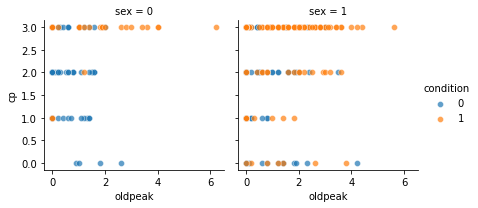

In [ ]:
# fg1 correlation between maximum heart rate achieved and chest pain type for men and women:
fg1 = sns.FacetGrid(d_heart, col="sex", hue="condition")
fg1.map(sns.scatterplot, "oldpeak", "cp", alpha=.7)
fg1.add_legend()

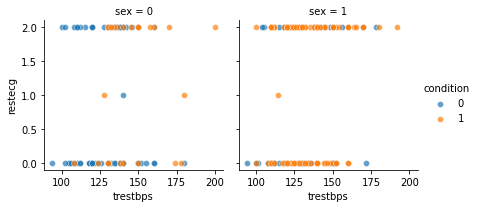

In [ ]:
# fg2 correlation between blood pressure and ECG during rest for men and women:
fg2 = sns.FacetGrid(d_heart, col="sex", hue="condition")
fg2.map(sns.scatterplot, "trestbps", "restecg", alpha=.7)
fg2.add_legend()

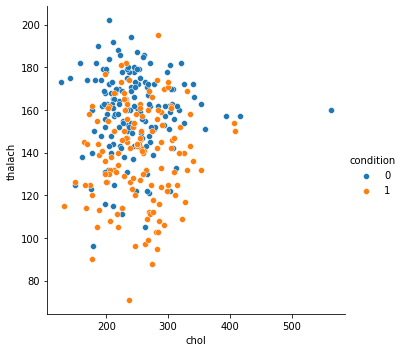

In [ ]:
# fg3 correlation between cholesterol and maximum heart rate achieved:
fg3 = sns.FacetGrid(d_heart, hue="condition", height=5)
fg3.map(sns.scatterplot,"chol","thalach")
fg3.add_legend()

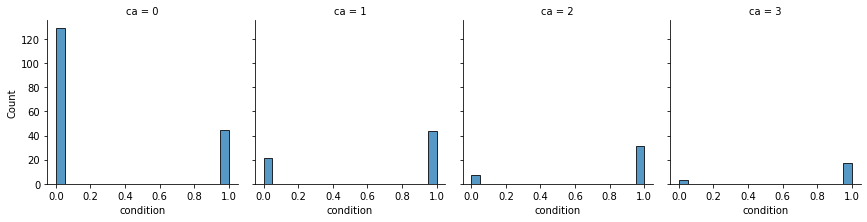

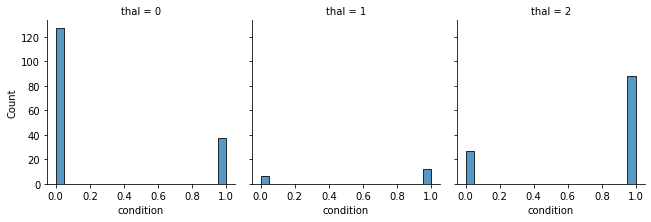

In [ ]:
# fg4 correlation between testing methods ca/thal and condition: 
items=['ca','thal']
for j in range(len(items)):
 g = sns.FacetGrid(d_heart, col=items[j])
 g.map_dataframe(sns.histplot, x="condition", bins=20)
 g.set_axis_labels("condition", "Count")

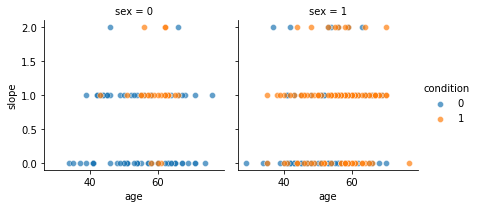

In [ ]:
# fg5 correlation between slope and condition: 
fg5 = sns.FacetGrid(d_heart, col="sex", hue="condition")
fg5.map(sns.scatterplot, "age", "slope", alpha=.7)
fg5.add_legend()

# **assumptions & conclusions:**

* 'fg1' shows that oldpeak may have no significant impact on condition due to lack of definite threshold. It might be dropped from the data set.
On the other hand, we can clearly distinguish between condition values of patients based on their cp values. Most of the orange dots (disease) appear in case number 3 (asymptomatic).
* Moreover, it seems that women are associated with condition 0 (no disease) more than men, even though men are more represented in the data set. It indicates that men are in greather risk of heart disease (according to this features).
* 'fg2' shows much clearer distribution of condition for trestbps - rest blood pressure (women - restecg case 2). The blood pressure is positively correlated to higher risk for probable or definite left ventricular hypertrophy by Estes' criteria. Furthermore, restecg case 1 (ST-T wave abnormality) is barely represented in the data set (only 4 patients) - the feature might be dropped due to non-balanced distribution.
* 'fg3' shows minor effect of chol on condition (almost balanced distribution). In contrast, thalach has threshold. Most of the blue dots (no disease) appear where maximum heart rate is higher.         
chol might be dropped from the data set.
* 'fg4' shows positive correlation between colored vessels and heart disease as it should. thal also present higher risk in cases 1 and 2 where patients have a heart defect. 
* 'fg5' shows non-balanced distribution in the slope values mostly for women, as we noticed in 'fg2' (only 4 patients with a slope value of 2). Furthermore, there is no clear definition of condition in any of the slope categories. It might be removed as restecg. Nevertheless, it seems that most patients with condition 1 (disease) are concentrated around slope values of 1, 2 (downsloping and flat) which may indicate heart defects. That concentration around these values can be clearly seen when analyzing the graph representing women.<br />
Reffering to age, it seems that most women with condition 1 (disease) are about 60 years old (some articles claim that the risk is higher for women when their period ends).

# **data engineering:**

* The model may operate better with categorical features then continious ones.
* It might be better dropping chol, oldpeak, slope and restecg for higher results. 


In [ ]:
# converting age to categorical feature:
# 0 - under 40 | 1- around 40-65 | 2- above 65

def to_category(value):
  if value < 40:
    return 0
  elif value > 65:
    return 2
  return 1

d_heart['age'] = d_heart['age'].apply(to_category)
d_heart['age'].value_counts()

In [ ]:
# remove non-balanced feature - not enough samples for case 1 in restecg (categorical feature):
d_heart = d_heart.drop(['restecg'] ,axis=1)
#d_heart = d_heart.drop(['slope'] ,axis=1) \case 2 in slope

In [ ]:
# both feature seems to have a minor effect on condition:
d_heart = d_heart.drop(['chol'] ,axis=1)
d_heart = d_heart.drop(['oldpeak'] ,axis=1)

# **establish a model:**

The models we operated are:
* decision tree
* random forest

We chose these as both are commonly used classifiers, and are complex enough for our problem.
We wanted to see whether it is neccessary to use a single tree or a more complex model such as a random forest. 
<br />
<br />
In this section we were testing three different max_depth values in order to maximize the success of the model.

We chose to split the data randomly, 70% train, 15% validation and 15% test.

In [ ]:
####################################################################################################################
# split data:
#################################################################################################################### 

X = d_heart.iloc[:,:-1]  
y = d_heart['condition']

# spliting data to train, validation & test:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/0.85, random_state=1)

 **baseline model:**

For the baseline model we chose to predict the most frequent label in the training set. 

In our case, it always predicts 0 - no disease (54% of the lables).

The model shows success of a bit more then 50% and it serves as a reference threshold for the models' examination. 

In [ ]:
def base(x):
    return [0 for _ in range(len(x))]

y_pred = base(X_test)
print(f'Recall: {recall_score(y_test, y_pred, average="micro")}')

Recall: 0.5555555555555556


**models:**

In [ ]:
def validator_func(clf, X_train, X_val, y_train, y_val):
  clf.fit(X_train, y_train)
  return clf.score(X_val, y_val)

In [ ]:
# decision tree : 
best_depth = None
best_score = None
optimal_tree = None
for max_depth in [5,6,7]:
   tree = DecisionTreeClassifier(max_depth=max_depth)
   score = validator_func(tree, X_train, X_val, y_train, y_val)
   if best_score is None or score > best_score:
     best_depth = max_depth
     best_score = score
     optimal_tree = tree

print(f'Best max_depth: {max_depth}')
optimal_tree.fit(X_train_val, y_train_val)
t_train_best_score = optimal_tree.score(X_train_val, y_train_val)
print(f'Best score wrt. training: {t_train_best_score}')
t_best_score = optimal_tree.score(X_test, y_test)
print(f'Best score wrt. test: {t_best_score}')

In [ ]:
####################################################################################################################
# random forest :
best_depth = None
best_score = None
optimal_forest = None
for max_depth in [5,6,7]:
   forest = RandomForestClassifier(max_depth=max_depth)
   score = validator_func(forest, X_train, X_val, y_train, y_val)
   if best_score is None or score > best_score:
     best_depth = max_depth
     best_score = score
     optimal_forest = forest

print(f'Best max_depth: {max_depth}')
optimal_forest.fit(X_train_val, y_train_val)
f_train_best_score = optimal_forest.score(X_train_val, y_train_val)
print(f'Best score wrt. training: {f_train_best_score}')
f_best_score = optimal_forest.score(X_test, y_test)
print(f'Best score wrt. test: {f_best_score}')


In [ ]:
####################################################################################################################
# recall - metric:
#################################################################################################################### 
y_true = y_test
t_pred = optimal_tree.predict(X_test)
f_pred = optimal_forest.predict(X_test)

y_tree = recall_score(y_true,t_pred)
y_forest = recall_score(y_true,f_pred)

print(y_tree)
print(y_forest)

In [ ]:
###################################################################################################################
# forest feature importance:
###################################################################################################################

f_feature_importance = pd.DataFrame({'features_names' : X.columns, 'Importance' : optimal_forest.feature_importances_})
f_feature_importance

,features_names,Importance
0,age,0.016115
1,sex,0.040375
2,cp,0.163896
3,trestbps,0.084951
4,fbs,0.006509
5,thalach,0.149097
6,exang,0.078739
7,slope,0.057288
8,ca,0.188611
9,thal,0.214421


In contrast to what we assumed, the table shows that age & sex don't affect much on decisions such as ca and thal, thalach and cp. 

Moreover, fbs seems to have a minor effect on decisions.


**results:**

In [ ]:
df = pd.DataFrame({"Train score": [t_train_best_score, f_train_best_score],"Test score":[t_best_score, f_best_score],'Test recall':[y_tree, y_forest]}, index=['Decision Tree', 'random forest'])
display(HTML(df.to_html()))


,Train score,Test score,Test recall
Decision Tree,0.956349,0.777778,0.8
random forest,0.928571,0.800000,0.9


# **results analysis & conclusions:**

* As the results show the random forest model performed better than the decision tree, though not in a great gap.                Therefore we chose to work with random forest.

* Another issue we noticed is that train score is much higher than test score, thus it seems like the model overfits a bit. We may try to train on less data to generalize the model.

# **improving preformance of the most optimal model:**

* examination of random forest hyper parameters
* evaluation of the model without using data engineering

In [ ]:
best_params = None
best_forest = None
best_score = None
for max_depth in [5,6,7]:
 for n_estimators in [100,150,200]:
  for min_samples_split in range(2, 11):
   for min_samples_leaf in range(1, 6):
    for criterion in ('gini', 'entropy'):
        params = {'max_depth': max_depth,'criterion': criterion,'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}
        forest = RandomForestClassifier(**params)
        forest.fit(X_train, y_train)
        score = forest.score(X_val, y_val)
        if best_score is None or score > best_score:
          best_params = params
          best_forest = forest
          best_score = score

print(f'Best params: {params}')
best_forest.fit(X_train_val, y_train_val)
train_best_score = best_forest.score(X_train_val, y_train_val)
print(f'Best score wrt. training: {train_best_score}')
best_score = best_forest.score(X_test, y_test)
print(f'Best score wrt. test: {best_score}')

In [ ]:
print(f"hyper parameters:{params} \n")
print("results with respect to data engineering:\n")
d_f = pd.DataFrame({"Train results": [0.92,0.89], "Test results":[0.8,0.8]}, index=['optimized wrt. max_depth', 'optimized wrt. all hyper parameters'])
display(HTML(d_f.to_html()))

print("\n\n results with respect to all the features:\n")
d_f = pd.DataFrame({"Train results": [0.93,0.92], "Test results":[0.8,0.84]}, index=['optimized wrt. max_depth', 'optimized wrt. all hyper parameters'])
display(HTML(d_f.to_html()))

hyper parameters:{'max_depth': 7, 'criterion': 'entropy', 'n_estimators': 200, 'min_samples_leaf': 5, 'min_samples_split': 10} 

results with respect to data engineering:



,Train results,Test results
optimized wrt. max_depth,0.92,0.8
optimized wrt. all hyper parameters,0.89,0.8




 results with respect to all the features:



,Train results,Test results
optimized wrt. max_depth,0.93,0.80
optimized wrt. all hyper parameters,0.92,0.84


# **results analysis & conclusions:**

* After applying data engineering, it seems that there is no improvement in the test score. It can be explained by the randomness of the model. By running it 3 times without fixing the random_state parameter, we've got scores of 0.77 and even 0.8. On the other hand, while testing the model without using any data engineering, the model preformed better. It can imply that changing the data set may not be required.

* After applying data engineering, the overfitting (represented by the difference between the train score and the test score) hasn't changed much.
It may imply that changing the data in such a way  does not have significant impact on overfitting.

# **testing different sizes of training set:**

In [ ]:
train_score = []
test_score = []
data_percentage = [0.1, 0.3, 0.5, 0.7, 1]

for p in data_percentage: 
 X_p = X[:int(X.shape[0]*p)]
 y_p = y[:int(y.shape[0]*p)]
 X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.3, random_state=42)
 best_forest.fit(X_train_p, y_train_p)
 train_score.append(best_forest.score(X_train_p, y_train_p))
 test_score.append(best_forest.score(X_test_p, y_test_p))


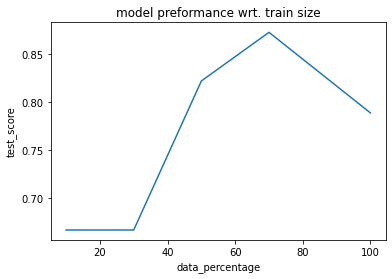

In [ ]:
plt.plot([x * 100 for x in data_percentage], test_score)
plt.title('model preformance wrt. train size')
plt.xlabel('data_percentage')
plt.ylabel('test_score')
plt.show()

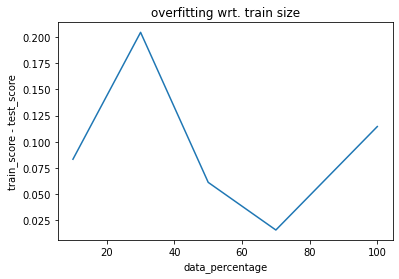

In [ ]:
plt.plot([x * 100 for x in data_percentage], np.array(train_score) - np.array(test_score))
plt.title('overfitting wrt. train size')
plt.xlabel('data_percentage')
plt.ylabel('train_score - test_score')
plt.show()

# **final results analysis & conclusions:**

* The graph shows that performance is affected by the size of the training set. It increases until the maximum value of ~70% test accuracy, and then drops, because the model may overfit when training on a too large data set.  
In addition, it seems that there is a negative correlation between overfitting and the test score; maximal overfitting (and minimal score) occurs in a model trained on ~30% of the train set, while minimal overfitting (and maximal score) occurs in a model trained on ~70% of the data set.

* A possible explanation to the maximal overfitting value on 30% might be that the training is done on a small amount of samples while they may not reflect the actual distribution of the data. Thus the test score might be very low. Moreover, if the original data set would have been larger, the scores for small amounts of samples may have been good enough for model usability.

* It is necessary to enrich the dataset with more samples. Based on our findings, the representation of women is poor and some conditional features seems to lack samples at list in one category.

* In our research we discovered that women's anatomy is different from men, so different tests are may required in order to reveal a heart disease. For that reason it may be needed to add more features for implementing the model in the medical field. 

**follow-up steps:**

* Exmine the effect of all the features according to feature importance and the results.
* Make changes to the data engineering by may converting other continuous features to categorical or dropping different features.
* Exmine more models which may preform better.

# **bibliograghy:**

https://www.kaggle.com/cherngs/heart-disease-cleveland-uci


https://www.kaggle.com/onatto/predicting-heart-disease-a-detailed-guide

https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226


https://www.tasmc.org.il/Articles/Cardiology/Pages/Women-Cardiology.aspx

https://www.ynet.co.il/articles/0,7340,L-5660384,00.html

https://www.timeofcare.com/typical-vs-atypical-chest-pain/


